<a href="https://colab.research.google.com/github/mmtog/Actividad-1-/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Cargar los datos (asumimos que tienes un archivo CSV llamado 'diamonds.csv')
df = pd.read_csv('diamonds.csv')

In [10]:
#Función para calcular la correlación y crear un scatter plot
def correlacion_y_scatter(x, y, titulo):
    # Eliminar filas con valores infinitos o NaN en las columnas relevantes
    # antes de calcular la correlación
    data = pd.DataFrame({'x': x, 'y': y}).dropna() # This will drop rows with NaN in either x or y columns
    x = data['x']
    y = data['y']

    corr, _ = stats.pearsonr(x, y)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    plt.title(f'{titulo}\nCorrelación: {corr:.2f}')
    plt.tight_layout()
    plt.show()

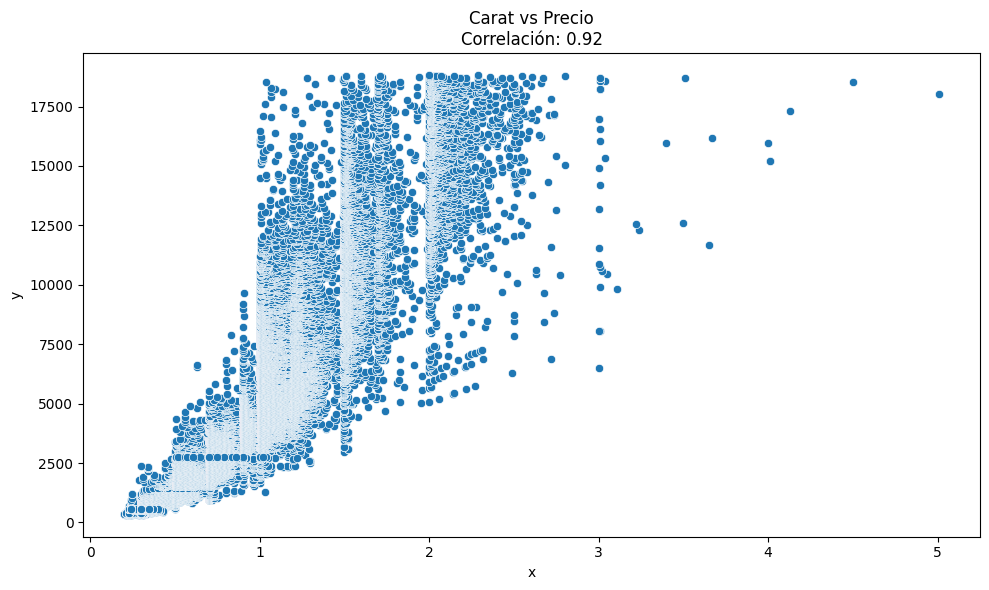

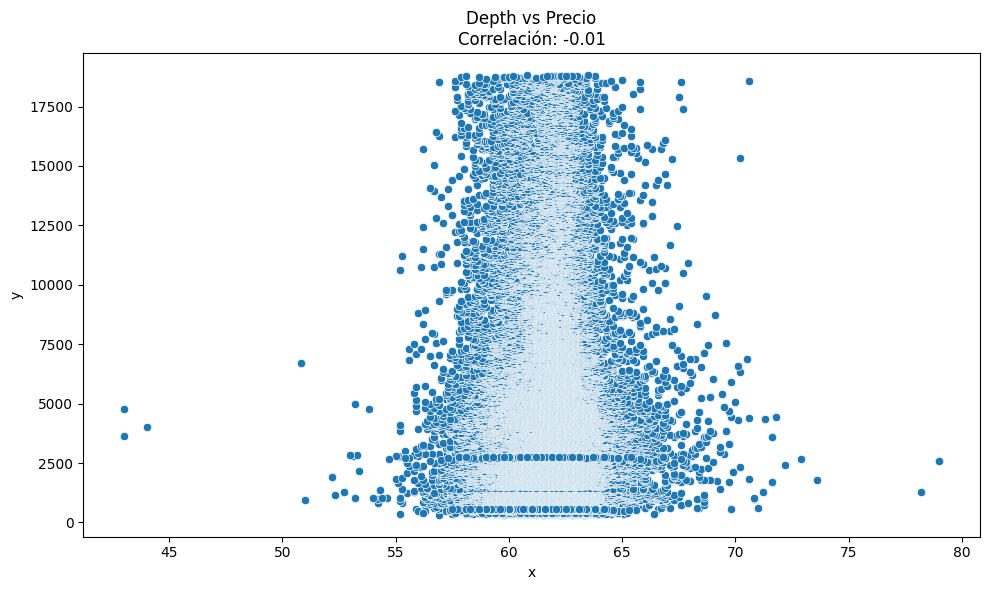

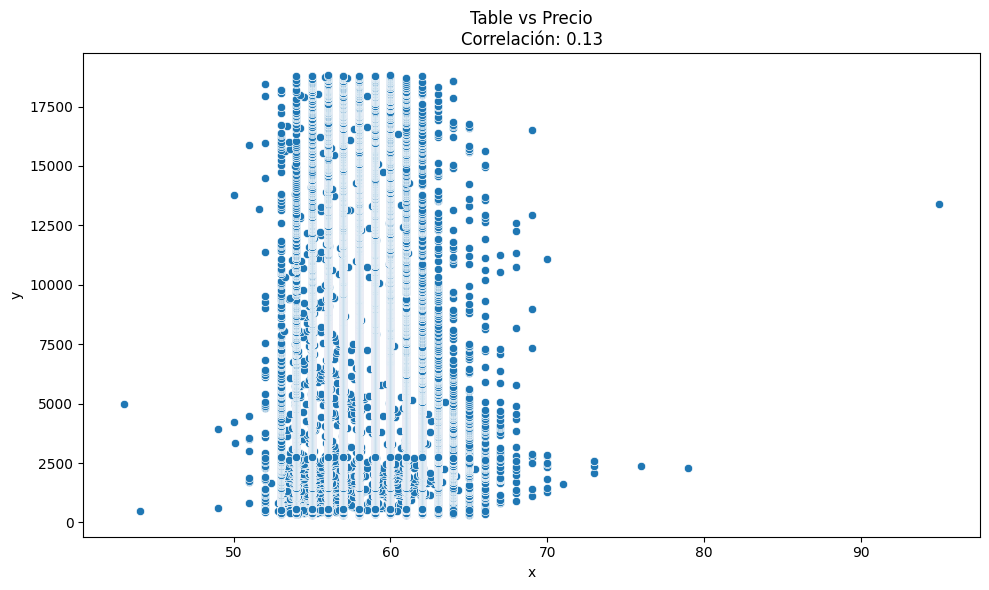

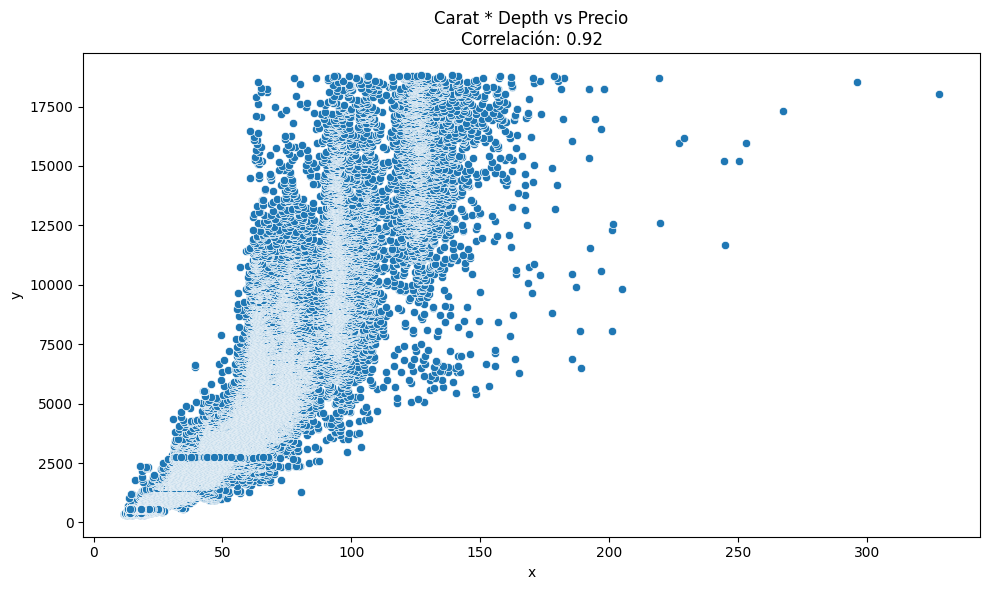

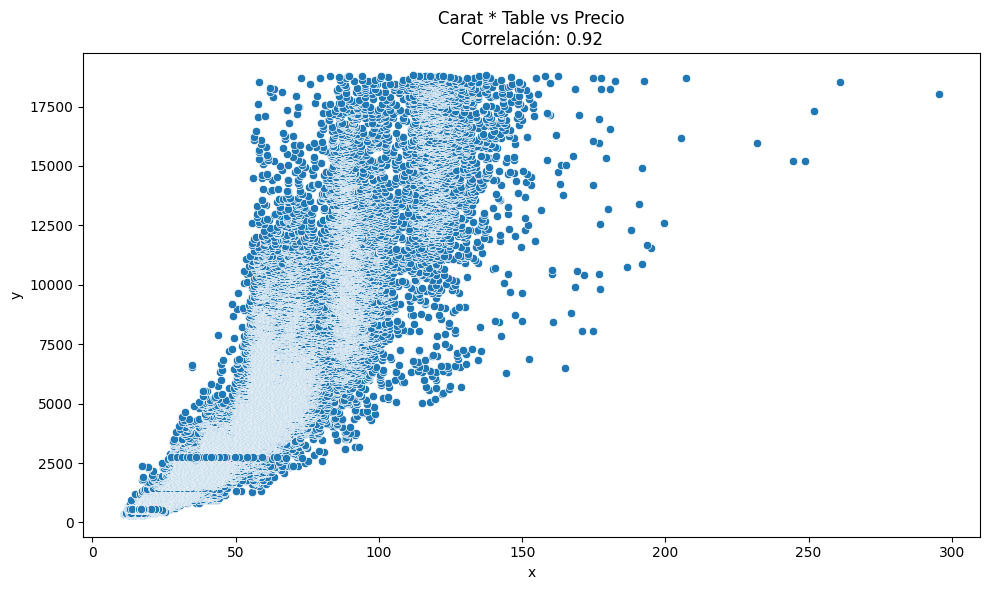

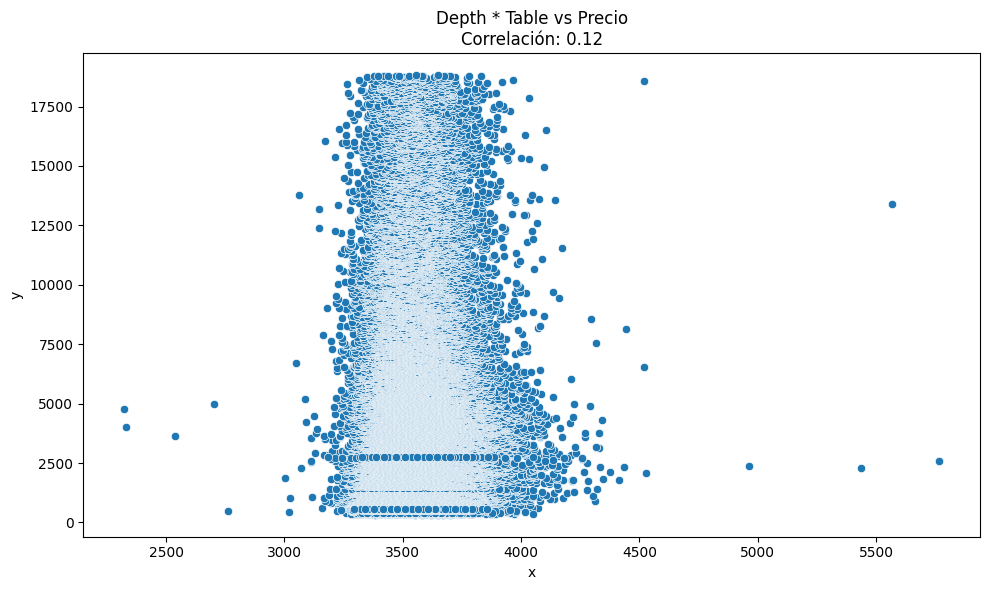

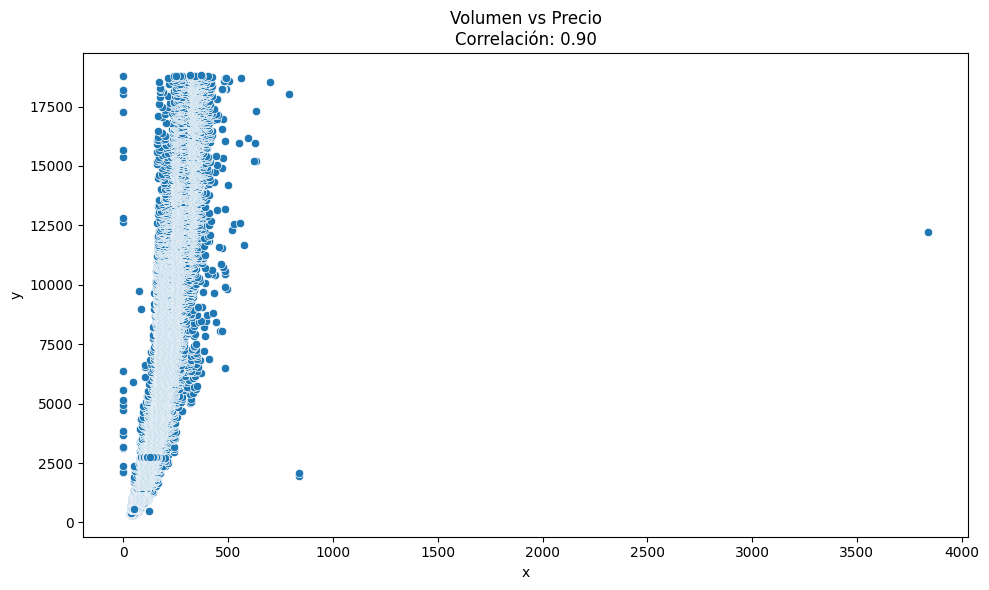

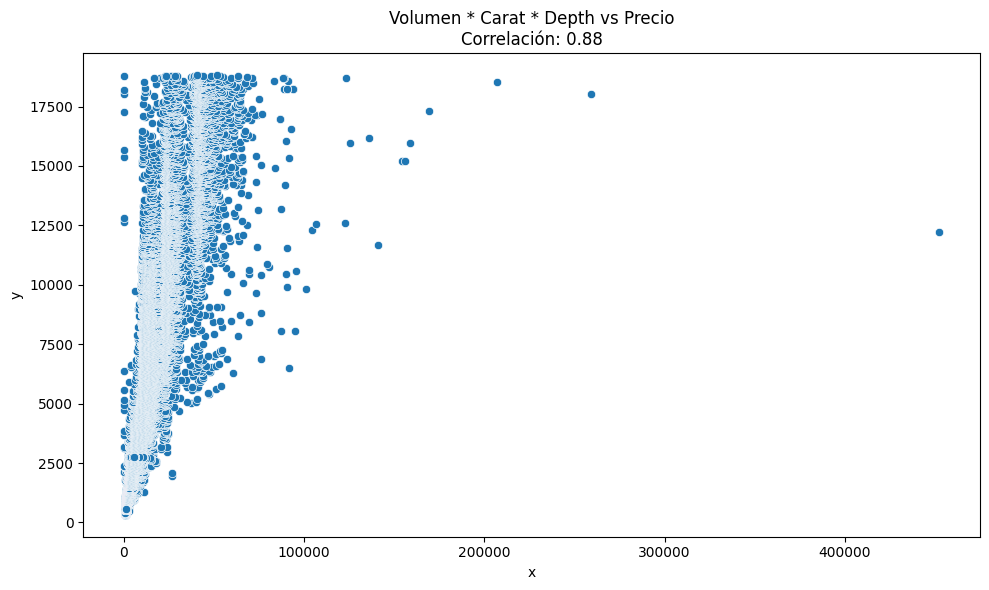

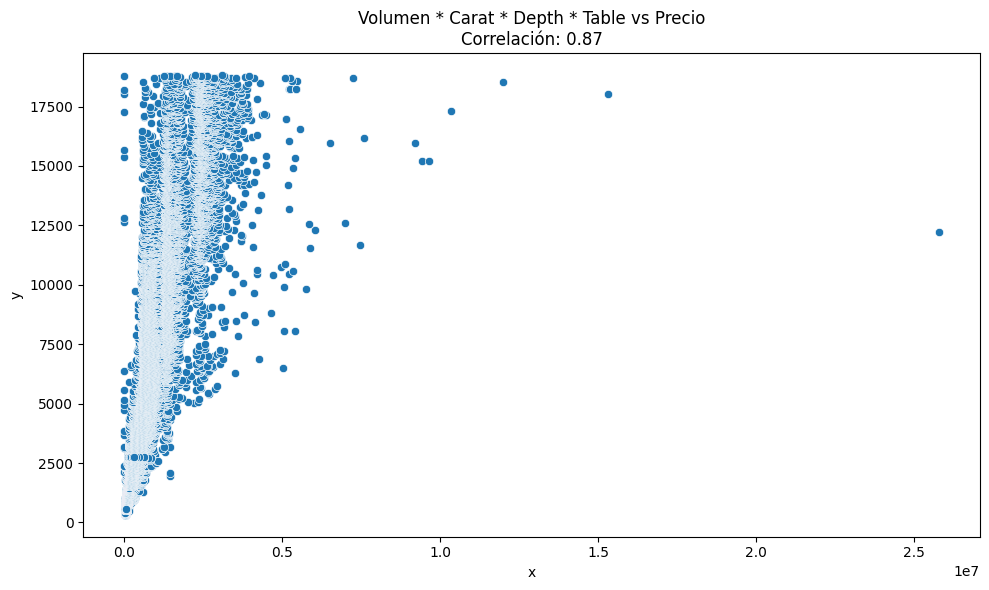

ValueError: array must not contain infs or NaNs

In [13]:
# a) Carat
correlacion_y_scatter(df['carat'], df['price'], 'Carat vs Precio')

# b) Depth
correlacion_y_scatter(df['depth'], df['price'], 'Depth vs Precio')

# c) Table
correlacion_y_scatter(df['table'], df['price'], 'Table vs Precio')

# d) Carat y depth
df['carat_depth'] = df['carat'] * df['depth']
correlacion_y_scatter(df['carat_depth'], df['price'], 'Carat * Depth vs Precio')

# e) Carat y table
df['carat_table'] = df['carat'] * df['table']
correlacion_y_scatter(df['carat_table'], df['price'], 'Carat * Table vs Precio')

# f) depth y table
df['depth_table'] = df['depth'] * df['table']
correlacion_y_scatter(df['depth_table'], df['price'], 'Depth * Table vs Precio')

# g) tamaño (x, y, z)
df['volumen'] = df['x'] * df['y'] * df['z']
correlacion_y_scatter(df['volumen'], df['price'], 'Volumen vs Precio')

# h) tamaño, carat y depth
df['volumen_carat_depth'] = df['volumen'] * df['carat'] * df['depth']
correlacion_y_scatter(df['volumen_carat_depth'], df['price'], 'Volumen * Carat * Depth vs Precio')

# i) tamaño, carat, depth y table
df['volumen_carat_depth_table'] = df['volumen'] * df['carat'] * df['depth'] * df['table']
correlacion_y_scatter(df['volumen_carat_depth_table'], df['price'], 'Volumen * Carat * Depth * Table vs Precio')

# Crear tabla comparativa de correlaciones
correlaciones = {
    'Variable(s)': ['Carat', 'Depth', 'Table', 'Carat * Depth', 'Carat * Table', 'Depth * Table', 'Volumen', 'Volumen * Carat * Depth', 'Volumen * Carat * Depth * Table'],
    'Correlación': [
        # Eliminar filas con valores infinitos o NaN en las columnas relevantes
        # antes de calcular la correlación
        # Dropping NaN values from both columns before calculating the correlation
        # Ensure both columns have the same length by dropping NaNs from both simultaneously
        stats.pearsonr(df['carat'].dropna(), df['price'].loc[df['carat'].dropna().index])[0],
        stats.pearsonr(df['depth'].dropna(), df['price'].loc[df['depth'].dropna().index])[0],
        stats.pearsonr(df['table'].dropna(), df['price'].loc[df['table'].dropna().index])[0],
        stats.pearsonr(df['carat_depth'].dropna(), df['price'].loc[df['carat_depth'].dropna().index])[0],
        stats.pearsonr(df['carat_table'].dropna(), df['price'].loc[df['carat_table'].dropna().index])[0],
        stats.pearsonr(df['depth_table'].dropna(), df['price'].loc[df['depth_table'].dropna().index])[0],
        stats.pearsonr(df['volumen'].dropna(), df['price'].loc[df['volumen'].dropna().index])[0],
        stats.pearsonr(df['volumen_carat_depth'].dropna(), df['price'].loc[df['volumen_carat_depth'].dropna().index])[0],
        stats.pearsonr(df['volumen_carat_depth_table'].dropna(), df['price'].loc[df['volumen_carat_depth_table'].dropna().index])[0]
    ]
}

tabla_correlaciones = pd.DataFrame(correlaciones)
tabla_correlaciones['Correlación'] = tabla_correlaciones['Correlación'].round(4)
tabla_correlaciones = tabla_correlaciones.sort_values('Correlación', ascending=False)

print("\nTabla comparativa de correlaciones:")
print(tabla_correlaciones)